# Set-up

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import textwrap

# for custom system fonts
import os
from matplotlib import font_manager as fm

In [3]:
# grab system font
fpath = os.path.join('/Users/marley/Library/Fonts/CENSCBK.TTF')
prop = fm.FontProperties(fname=fpath, size=10)
fname = os.path.split(fpath)[1]   

In [11]:
folder = sorted(os.listdir('../data_files'))
for file in folder:
    if file[-4:] != '.csv':
        folder.remove(file)
    else:
        pass
folder = folder[1:-1]

In [12]:
# reset counter to begin at 0
n = -1

# ** Choose File **

In [13]:
n

-1

In [14]:
n = n + 1
print('file number:',n)

file = folder[n]
g = pd.read_csv(file)
g

file number: 0


,Top Responses on Democracy & US Government,Urban,Rural
0,"""Somewhat Proud"" of How American Democracy Works",0.466,0.483
1,"""Hardly Any"" Confidence in the Executive Branch",0.467,0.444
2,"""Hardly Any"" Confidence in the Legislative Branch",0.477,0.444
3,"""Only Some"" Confidence in the Judicial Branch",0.512,0.539


# % Graphs

In [7]:
# adjust
#file = folder[n]
file = 'ch1_fig10.csv'
g = pd.read_csv(file)
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)
#g = g.drop('Diff', axis=1)
#g.Urban = g.Urban.str[:-1].astype(float) / 100
#g.Rural = g.Rural.str[:-1].astype(float) / 100
#g = g.iloc[:4,:2]
#g = g.dropna()
g

,Urban,Rural
Attitudes Towards Atheists,,
Very Positive,0.100,0.060
Somewhat Positive,0.219,0.113
Neither Positive nor Negative,0.421,0.391
Somewhat Negative,0.129,0.113
Very Negative,0.079,0.248


In [ ]:
g.index.name = 'Regional Agricultural Employment Dynamics'

In [ ]:
# IF looks good, overwrite saved file
g.to_csv(file)

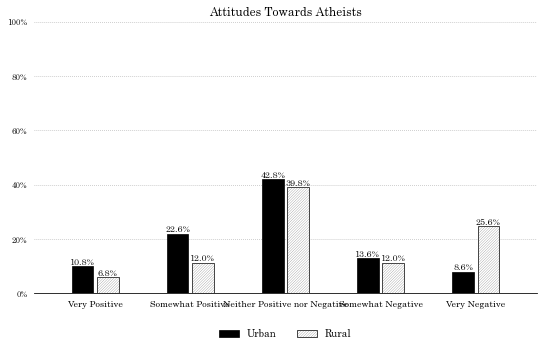

In [14]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name#[:-11]
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            height = height + .0075
        else:
            height = height - .035
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x_metro = [x - width/2 - .02 for x in range(len(g.Urban))]
x_rural = [x + width/2 + .02 for x in range(len(g.Rural))]

bar1 = ax.bar(x_metro, g.Urban, width, zorder=3, label='Urban', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x_rural, g.Rural, width, zorder=3, label='Rural', color='white', edgecolor='black', hatch='/////////', lw=.7)
ax.bar(g.index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.3).round(2)))
ax.set(ylim=(0, 1))
#ax.set(ylim=(-.5, .5))
plt.show()

In [ ]:
#### if good, export
ax.get_figure().savefig(filename + '.jpg', dpi=300, bbox_inches='tight')

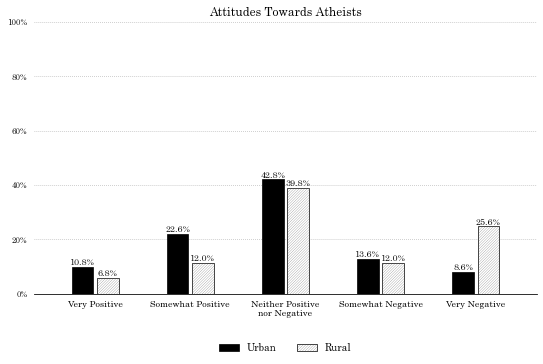

In [15]:
# if not, run this code to wrap text and export
positions = range(0,len(g.index))
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))

wrap_labels(ax, 18)

legendheight = -0.25
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))

ax.get_figure().savefig(filename + '.jpg', dpi=300, bbox_inches='tight')
ax.figure

# $ graphs

In [4]:
# adjust
#file = folder[n]
file = 'ch2_fig14.csv'
g = pd.read_csv(file)
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)
#g = g.dropna()
#g.Urban = g.Urban.str[1:].replace(',','', regex=True).astype(float)
#g.Rural = g.Rural.str[1:].replace(',','', regex=True).astype(float)
g

,Urban,Rural
County Median Household Income (2019),,
Coastal West,67832.0,51779.0
Interior Northwest,57935.0,50496.0
Mid-Atlantic,64327.0,49140.0
Midwest,61466.0,52844.0
New England,74397.0,52314.0
South,52890.0,41309.0
Southwest,65427.0,47733.0
Total,59186.0,48544.0


In [ ]:
g.index.name = 'County Median Household Income (2019)'

In [ ]:
# IF looks good, overwrite saved file
g.to_csv(file)

/var/folders/zt/6n98kvbj18gbkhpx3fc08jx80000gn/T/ipykernel_40834/1800172717.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$' + '{:,.0f}'.format(x) for x in ax.get_yticks()])


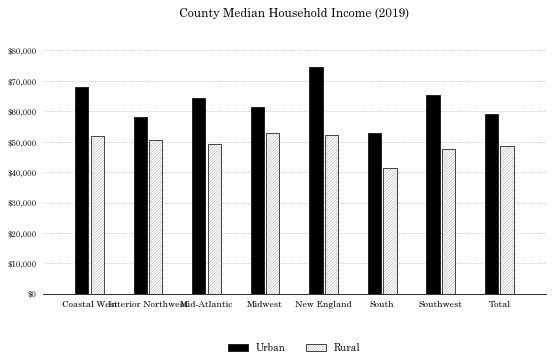

In [5]:
# set graph specs
legendheight = -0.25
width = 0.225
title = g.index.name
#ytitle = 'Response Percentage'
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('$' + str((height)),
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.01),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x_metro = [x - width/2 - .02 for x in range(len(g.Urban))]
x_rural = [x + width/2 + .02 for x in range(len(g.Rural))]

bar1 = ax.bar(x_metro, g.Urban, width, zorder=3, label='Urban', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x_rural, g.Rural, width, zorder=3, label='Rural', color='white', edgecolor='black', hatch='/////////', lw=.7)
ax.bar(g.index, 0)

#autolabel(bar1)
#autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s
ax.set_yticklabels(['$' + '{:,.0f}'.format(x) for x in ax.get_yticks()])

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
plt.show()

In [ ]:
# if good, export
ax.get_figure().savefig(filename + '.jpg', dpi=300, bbox_inches='tight')

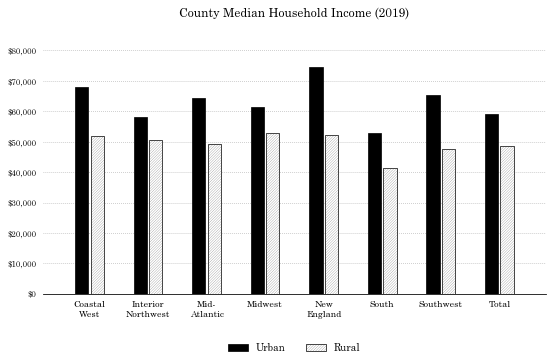

In [6]:
# if not, run this code to wrap text and export
positions = range(0,len(g.index))
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))

wrap_labels(ax, 5)

ax.get_figure().savefig(filename + '.jpg', dpi=300, bbox_inches='tight')
ax.figure

# Special comparisons

In [ ]:
# adjust
file = folder[n]

g = pd.read_csv(file)
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)
#g = g.drop('Diff', axis=1)
#g['<$10K'] = g['<$10K'].str[:-1].astype(float) / 100
#g['≥$150K'] = g['≥$150K'].str[:-1].astype(float) / 100
#g.Diff = g.Rural.str[:-1].astype(float) / 100
#g = g.iloc[:,:2]
g

In [ ]:
g.iloc[11:13]

In [ ]:
g.index.name = 'City/Town/Rural Yearly Household Income Comparison (2019)'

In [ ]:
# save
g.to_csv(file)

In [ ]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.003),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]

bar1 = ax.bar(x1[:3], g.iloc[:3,0], width, zorder=3, label='< $10k/yr', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2[:3], g.iloc[:3,1], width, zorder=3, label='≥ $150k/yr', color='white', edgecolor='black', hatch='/////////', lw=.7)
ax.bar(g.iloc[:3,0].index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
#ax.set(ylim=(0,.1))
plt.show()

In [ ]:
# if good, export
ax.get_figure().savefig(filename + '.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# if not, run this code to wrap text and export
positions = range(0,len(g.iloc[:5].index))
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))

wrap_labels(ax, 20)

legendheight = -0.25
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))

ax.get_figure().savefig(filename + '_1.jpg', dpi=300, bbox_inches='tight')
ax.figure

In [ ]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.003),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]

bar1 = ax.bar(x1[5:7], g.iloc[5:7,0], width, zorder=3, label='< $10k/yr', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2[5:7], g.iloc[5:7,1], width, zorder=3, label='≥ $150k/yr', color='white', edgecolor='black', hatch='/////////', lw=.7)
#ax.bar(g.iloc[5:7,0].index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
#ax.set(ylim=(0,.1))
plt.xticks(ticks=[5.0, 6.0], labels=['Philadelphia County, PA\n(Philadelphia)', 'Rural Pennsylvania\n(counties pooled)'])
plt.show()

In [ ]:
# if good, export
ax.get_figure().savefig(filename + '_2.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.003),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]

bar1 = ax.bar(x1[8:10], g.iloc[8:10,0], width, zorder=3, label='< $10k/yr', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2[8:10], g.iloc[8:10,1], width, zorder=3, label='≥ $150k/yr', color='white', edgecolor='black', hatch='/////////', lw=.7)
#ax.bar(g.iloc[5:7,0].index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
#ax.set(ylim=(0,.1))
plt.xticks(ticks=[8.0, 9.0], labels=['Los Angeles County, CA\n(Greater LA)', 'Rural California\n(counties pooled)'])
plt.show()

In [ ]:
# if good, export
ax.get_figure().savefig(filename + '_3.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.003),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]

bar1 = ax.bar(x1[11:13], g.iloc[11:13,0], width, zorder=3, label='< $10k/yr', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2[11:13], g.iloc[11:13,1], width, zorder=3, label='≥ $150k/yr', color='white', edgecolor='black', hatch='/////////', lw=.7)
#ax.bar(g.iloc[5:7,0].index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
#ax.set(ylim=(0,.1))
plt.xticks(ticks=[11.0, 12.0], labels=['Suffolk County, MA\n(Boston)', 'Rural Massachusetts\n(counties pooled)'])
plt.show()

In [ ]:
# if good, export
ax.get_figure().savefig(filename + '_4.jpg', dpi=300, bbox_inches='tight')

# Time series graphs

In [ ]:
# files in folder position 17 & 18
file = folder[n]

g = pd.read_csv(file)
g = g.set_index([g.iloc[:,0], g.iloc[:,1]])
g = g.drop(g.iloc[:,0].name, axis=1)
g = g.drop(g.iloc[:,0].name, axis=1)
g = g.dropna(axis=1)
g['1990'] = g['1990'].str[:-1].astype(float) / 100
g['2000'] = g['2000'].str[:-1].astype(float) / 100
g['2010'] = g['2010'].str[:-1].astype(float) / 100
g['2019'] = g['2019'].str[:-1].astype(float) / 100
tg2 = g
tg2

In [ ]:
# export
tg2.T.to_csv('ch2_fig18.csv')

# Single bar graph

In [ ]:
folder[n]

In [ ]:
# adjust
#file = folder[n]
file = 'ch2_fig28.csv'
g = pd.read_csv(file)
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)
#g = g.iloc[:,0].dropna()
#g = g.str[:-1].astype(float) / 100
g

In [ ]:
#g.index.name = 'Professional, Scientific, & Technical Services Sector Growth Rates'

In [ ]:
g.to_csv(file)

In [ ]:
g.iloc[:,0]

In [ ]:
# set graph specs
legendheight = -0.25
width = 0.7
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            height = height + .0225
        else:
            height = height - .055
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
bar1 = ax.bar(g.index, g.iloc[:,0], width, zorder=3, label=None, color='black', edgecolor='black', lw=.7)

#bar1 = ax.bar(g.index, g.values, width, zorder=3, label='Metro', color='black', edgecolor='black', lw=.7)

autolabel(bar1)
#autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
#ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.15).round(2)))
#ax.set(ylim=(-.75,.75))
plt.show()

In [ ]:
# if good, export
ax.get_figure().savefig(filename + '.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# if not, run this code to wrap text and export
positions = range(0,len(g.index))
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))

wrap_labels(ax, 5)

ax.get_figure().savefig(filename + '.jpg', dpi=300, bbox_inches='tight')
ax.figure